# Credit Card Application Approval Prediction

The credit card applications are ever increasing and it has become difficult for companies to manually analyze each of the applications. There is a need of an automated and high quality credit card approval prediction system. Machine learning can help to automate this process and save time for the companies.

In this notebook, we will try to build a model to predict whether a credit card application will be approved.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt

In [2]:
# Reading the credit card application data
credit_card_dataset = pd.read_csv('crx.data', header = None)
# Observe the first 10 entries in the data
credit_card_dataset.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


In [3]:
# Observe the last 20 entries in the data
credit_card_dataset.tail(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


As we see in the data above, the values do not look meaningful. They have been transformed in order to maintain confidentiality. The article http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html gives idea about the variable types. Also the '?' in row 673 indicates missing values.

 - Male          : num  1 1 0 0 0 0 1 0 0 0 ...
 - Age           : chr  "58.67" "24.50" "27.83" "20.17" ...
 - Debt          : num  4.46 0.5 1.54 5.62 4 ...
 - Married       : chr  "u" "u" "u" "u" ...
 - BankCustomer  : chr  "g" "g" "g" "g" ...
 - EducationLevel: chr  "q" "q" "w" "w" ...
 - Ethnicity     : chr  "h" "h" "v" "v" ...
 - YearsEmployed : num  3.04 1.5 3.75 1.71 2.5 ...
 - PriorDefault  : num  1 1 1 1 1 1 1 1 1 0 ...
 - Employed      : num  1 0 1 0 0 0 0 0 0 0 ...
 - CreditScore   : num  6 0 5 0 0 0 0 0 0 0 ...
 - DriversLicense: chr  "f" "f" "t" "f" ...
 - Citizen       : chr  "g" "g" "g" "s" ...
 - ZipCode       : chr  "00043" "00280" "00100" "00120" ...
 - Income        : num  560 824 3 0 0 ...
 - Approved      : chr  "+" "+" "+" "+" ...

### We will rename the columns so that they become easy to visualize

In [4]:
credit_card_dataset.columns = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity',
                               'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense',
                               'Citizen', 'ZipCode', 'Income', 'Approved']
credit_card_dataset.head(10)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


In [5]:
#Find out null values
credit_card_dataset.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

### Is null shows 0 for all columns because it doesn't recognize '?' as NULL.

In [6]:
#Find out the data types
credit_card_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [7]:
#Replace '?' with NaN so that we can detect Null values
credit_card_dataset = credit_card_dataset.replace('?', np.nan)
credit_card_dataset.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

### We cannot ignore entries with missing values as we may end up losing valuable training data. We will first use mean imputation to replace missing values with the mean value. 
### Note: Mean Imputation will work only on Columns with numeric datatype.

In [8]:
#Observe that many columns here have missing values. We need to fix these before moving further.

#Mean Imputation
credit_card_dataset.fillna(credit_card_dataset.mean(), inplace = True)


#Still some missing values (Present in columns with non numeric type)
credit_card_dataset.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

In [9]:
#For columns with non numeric datatype, we will replace missing values with the most frequent values
for col in credit_card_dataset.columns:
    #non numeric columns have data type as 'object'
    if (credit_card_dataset[col].dtypes == 'object'):
        #value counts gives the frequencies of each value in column in descending order
        credit_card_dataset = credit_card_dataset.fillna(credit_card_dataset[col].value_counts().index[0])
        
#Check again for missing values
credit_card_dataset.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

### Now that the missing values have been handled, we can proceed further.
- We need to convert non numeric values into numeric values.
- Scale all features to be within the same range. (Normalization)

In [10]:
# We use LabelEncoder to convert non numeric values to numeric ones
#print(credit_card_dataset.columns.values)
#print(credit_card_dataset[credit_card_dataset.columns.values].corr())
# Label Encoder encodes target labels with value between 0 and n_classes-1.
# LabelEncoder can be used to normalize labels
le = LabelEncoder()
for col in credit_card_dataset.columns.values:
    if credit_card_dataset[col].dtypes=='object':
        # Use LabelEncoder to do the numeric transformation
        #Fit Transform: Fit label encoder and return encoded labels.
        credit_card_dataset[col]=le.fit_transform(credit_card_dataset[col])
        print(credit_card_dataset[col])

0      1
1      0
2      0
3      1
4      1
      ..
685    1
686    0
687    0
688    1
689    1
Name: Gender, Length: 690, dtype: int64
0      156
1      328
2       89
3      125
4       43
      ... 
685     52
686     71
687     97
688     20
689    197
Name: Age, Length: 690, dtype: int64
0      2
1      2
2      2
3      2
4      2
      ..
685    3
686    2
687    3
688    2
689    2
Name: Married, Length: 690, dtype: int64
0      1
1      1
2      1
3      1
4      1
      ..
685    3
686    1
687    3
688    1
689    1
Name: BankCustomer, Length: 690, dtype: int64
0      13
1      11
2      11
3      13
4      13
       ..
685     5
686     2
687     6
688     0
689     2
Name: EducationLevel, Length: 690, dtype: int64
0      8
1      4
2      4
3      8
4      8
      ..
685    4
686    8
687    3
688    8
689    4
Name: Ethnicity, Length: 690, dtype: int64
0      1
1      1
2      1
3      1
4      1
      ..
685    0
686    0
687    0
688    0
689    0
Name: PriorDefault,

### Before normalizing the data, we will split dataset into train and test sets,  because no observation in the testing dataset should be used to scale the training data. We will drop DriversLicense and ZipCode columns as they are not very important to predict the outcome.

In [11]:
# Drop the features DriversLicense and ZipCode
credit_card_dataset = credit_card_dataset.drop(['DriversLicense', 'ZipCode'], axis=1)
#convert the DataFrame to a NumPy array
credit_card_dataset = credit_card_dataset.values
print(f'Shape of numpy array after dropping 2 columns is {credit_card_dataset.shape}')

# As 2 columns have been removed, we are left with 14 columns
# 14th column (index 13 is the target variable)
# X = set of independent variables, y = dependent variable
X,y = credit_card_dataset[:,0:13] , credit_card_dataset[:,13]

# Split data into train and test sets (33% of data in the test set)
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)

Shape of numpy array after dropping 2 columns is (690, 14)


### Scale the independent variable values (0-1) using MinMaxScaler

In [12]:
#As we want the values to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
# We use fit_transform() on the train data so that we learn the parameters of scaling on the train
# data and in the same time we scale the train data. We only use transform() on the test data 
# because we use the scaling paramaters learned on the train data to scale the test data.
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Fitting Logistic Regression Model

In [13]:
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(scaled_X_train, y_train)

LogisticRegression()

### Evaluating performance using Confusion Matrix and Score

Accuracy of logistic regression classifier:  0.8421052631578947
[[94  9]
 [27 98]]


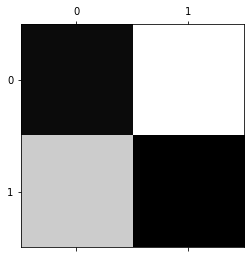

In [14]:
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(scaled_X_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(scaled_X_test, y_test))

# Printing the confusion matrix of the logreg model
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.matshow(cm , cmap = 'binary')

### Grid Searching for better model performance (Algorithm Tuning/Hyperparameter Optimization)

Grid search builds and evaluates a model for each combination of algorithm parameters specified in a grid.
For this project, we will grid search for the hyperparameters tol and max_iter.

From sklearn Logistic Regression documentation:
- tol : float, default=1e-4
Tolerance for stopping criteria.

- max_iter : int, default=100
Maximum number of iterations taken for the solvers to converge.

In [15]:
# Defining the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol = tol, max_iter = max_iter)

'''
From the GridSearchCV documentation
cv : int, cross-validation generator or an iterable, default=None
Determines the cross-validation splitting strategy. Possible inputs for cv are:

None, to use the default 5-fold cross validation,

integer, to specify the number of folds in a (Stratified)KFold,

CV splitter,

An iterable yielding (train, test) splits as arrays of indices.

For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, 
StratifiedKFold is used. In all other cases, KFold is used.
'''
# Initialize GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Instead of using train, test sets separately, we just use rescaled X and y
# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.850725 using {'max_iter': 100, 'tol': 0.01}


### With hyperparameter optimization, we were able to improve the accuracy to about 85%. Such a predictor has wide applications in the banking industry and can be studied further to reveal important insights.